In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

In [2]:
header = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'label']
df = pd.read_csv('./vertebral_column_data/column_3C.dat', sep=' ', header=None, names=header)

print(df.dtypes)

pelvic_incidence              float64
pelvic_tilt                   float64
lumbar_lordosis_angle         float64
sacral_slope                  float64
pelvic_radius                 float64
grade_of_spondylolisthesis    float64
label                          object
dtype: object


In [3]:
# feature extraction
X = df.iloc[:,0:6]
Y = df.iloc[:,6]

print(X.dtypes)
print(Y.dtypes)

pelvic_incidence              float64
pelvic_tilt                   float64
lumbar_lordosis_angle         float64
sacral_slope                  float64
pelvic_radius                 float64
grade_of_spondylolisthesis    float64
dtype: object
object


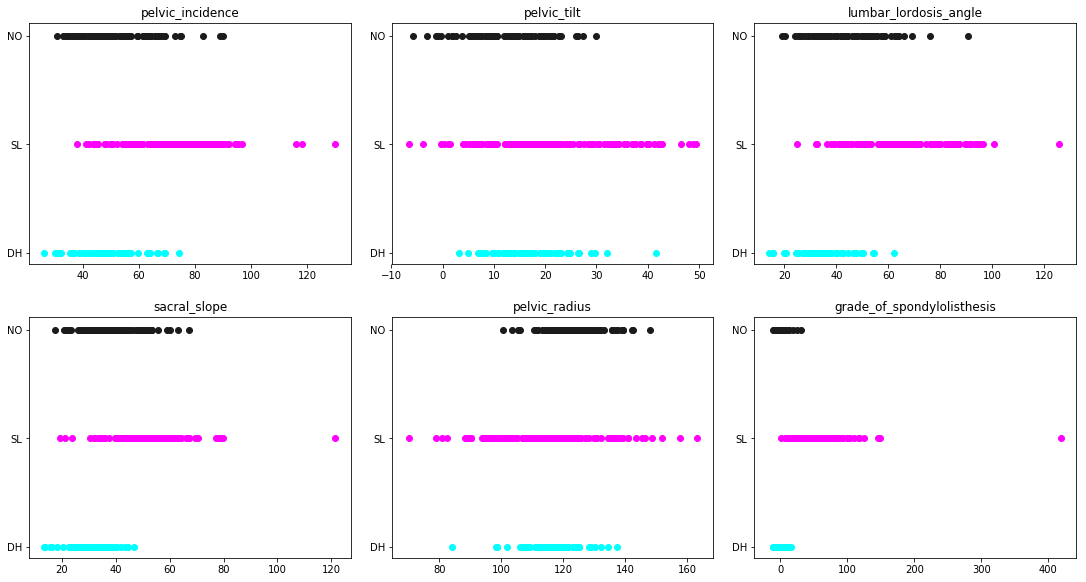

In [4]:
# Cross-Sections

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(231)
ax1.scatter(X[Y=='DH']['pelvic_incidence'], Y[Y=='DH'], label='DH', c='cyan')
ax1.scatter(X[Y=='SL']['pelvic_incidence'], Y[Y=='SL'], label='SL', c='magenta')
ax1.scatter(X[Y=='NO']['pelvic_incidence'], Y[Y=='NO'], label='NO', c='#1B1B1B')
ax1.set_title("pelvic_incidence")

ax2 = fig.add_subplot(232)
ax2.scatter(X[Y=='DH']['pelvic_tilt'], Y[Y=='DH'], label='DH', c='cyan')
ax2.scatter(X[Y=='SL']['pelvic_tilt'], Y[Y=='SL'], label='SL', c='magenta')
ax2.scatter(X[Y=='NO']['pelvic_tilt'], Y[Y=='NO'], label='NO', c='#1B1B1B')
ax2.set_title("pelvic_tilt")

ax3 = fig.add_subplot(233)
ax3.scatter(X[Y=='DH']['lumbar_lordosis_angle'], Y[Y=='DH'], label='DH', c='cyan')
ax3.scatter(X[Y=='SL']['lumbar_lordosis_angle'], Y[Y=='SL'], label='SL', c='magenta')
ax3.scatter(X[Y=='NO']['lumbar_lordosis_angle'], Y[Y=='NO'], label='NO', c='#1B1B1B')
ax3.set_title("lumbar_lordosis_angle")

ax4 = fig.add_subplot(234)
ax4.scatter(X[Y=='DH']['sacral_slope'], Y[Y=='DH'], label='DH', c='cyan')
ax4.scatter(X[Y=='SL']['sacral_slope'], Y[Y=='SL'], label='SL', c='magenta')
ax4.scatter(X[Y=='NO']['sacral_slope'], Y[Y=='NO'], label='NO', c='#1B1B1B')
ax4.set_title("sacral_slope")

ax5 = fig.add_subplot(235)
ax5.scatter(X[Y=='DH']['pelvic_radius'], Y[Y=='DH'], label='DH', c='cyan')
ax5.scatter(X[Y=='SL']['pelvic_radius'], Y[Y=='SL'], label='SL', c='magenta')
ax5.scatter(X[Y=='NO']['pelvic_radius'], Y[Y=='NO'], label='NO', c='#1B1B1B')
ax5.set_title("pelvic_radius")

ax6 = fig.add_subplot(236)
ax6.scatter(X[Y=='DH']['grade_of_spondylolisthesis'], Y[Y=='DH'], label='DH', c='cyan')
ax6.scatter(X[Y=='SL']['grade_of_spondylolisthesis'], Y[Y=='SL'], label='SL', c='magenta')
ax6.scatter(X[Y=='NO']['grade_of_spondylolisthesis'], Y[Y=='NO'], label='NO', c='#1B1B1B')
ax6.set_title("grade_of_spondylolisthesis")

plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=2.0)
plt.show()

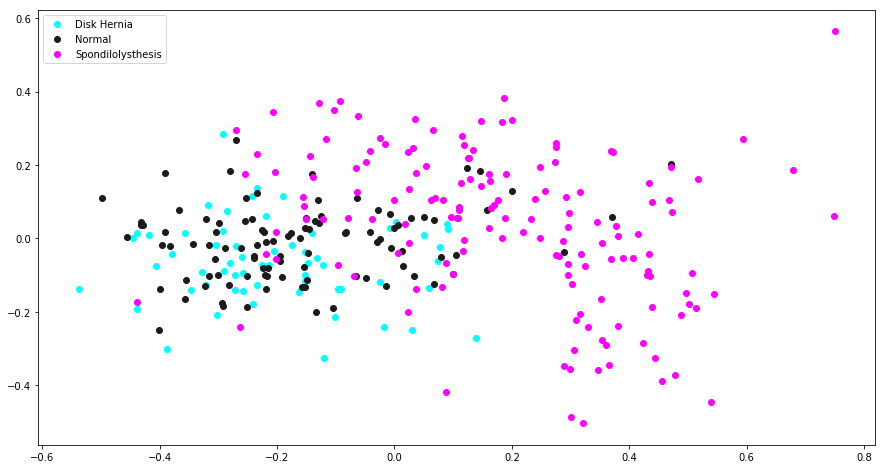

In [5]:
# mean normalization and feature scaling
X_norm = (X - X.mean())/(X.max() - X.min())

# principle component analysis
pca = PCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

# plot
plt.figure(figsize=(15,8))
plt.scatter(transformed[Y=='DH'][0], transformed[Y=='DH'][1], label='Disk Hernia', c='cyan')
plt.scatter(transformed[Y=='NO'][0], transformed[Y=='NO'][1], label='Normal', c='#1B1B1B')
plt.scatter(transformed[Y=='SL'][0], transformed[Y=='SL'][1], label='Spondilolysthesis', c='magenta')
plt.legend()
plt.show()

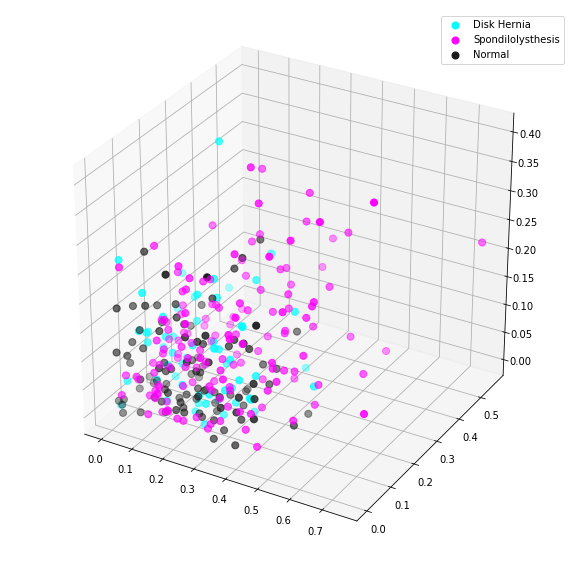

In [6]:
pca = PCA(n_components=3)
transformed_3d = pd.DataFrame(pca.fit_transform(X_norm)).abs()

fig3 = plt.figure(figsize=(10,10))
ax = fig3.add_subplot(111, projection='3d')
ax.scatter(transformed_3d[Y=='DH'][0], transformed_3d[Y=='DH'][1], transformed_3d[Y=='DH'][2], label='Disk Hernia', c='cyan', marker='o', s=50.0)
ax.scatter(transformed_3d[Y=='SL'][0], transformed_3d[Y=='SL'][1], transformed_3d[Y=='SL'][2], label='Spondilolysthesis', c='magenta', marker='o', s=50.0)
ax.scatter(transformed_3d[Y=='NO'][0], transformed_3d[Y=='NO'][1], transformed_3d[Y=='NO'][2], label='Normal', c='#1B1B1B', marker='o', s=50.0)
plt.legend()
plt.show()

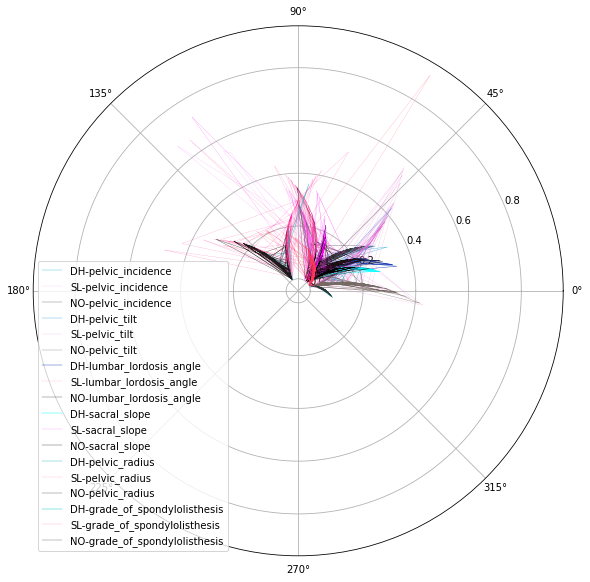

In [7]:
fig2 = plt.figure(figsize=(8,8))

labels = header[0:6]
ax1 = fig2.add_subplot(111, projection='polar')
colDH =['#50BFE6', '#5DADEC', '#2243B6', 'cyan', '#30BFBF', '#00CCCC']
colSL =['#FC74FD', '#E667CE', '#F653A6', 'magenta', '#FF3399', '#FF355E']
colNO =['#353839', '#736A62', '#1A1110', 'black', '#1B1B1B', '#2D383A']

for i, label in enumerate(labels[:]):
    ax1.plot(X[Y=='DH'][label]*(np.pi/180), X_norm[Y=='DH'][label].abs(), label='DH-'+label, c=colDH[i], lw = 0.43)
    ax1.plot(X[Y=='SL'][label]*(np.pi/180), X_norm[Y=='SL'][label].abs(), label='SL-'+label, c=colSL[i], lw = 0.13)
    ax1.plot(X[Y=='NO'][label]*(np.pi/180), X_norm[Y=='NO'][label].abs(), label='NO-'+label, c=colNO[i], lw=0.3)

plt.legend()
plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=2.0)
plt.show()

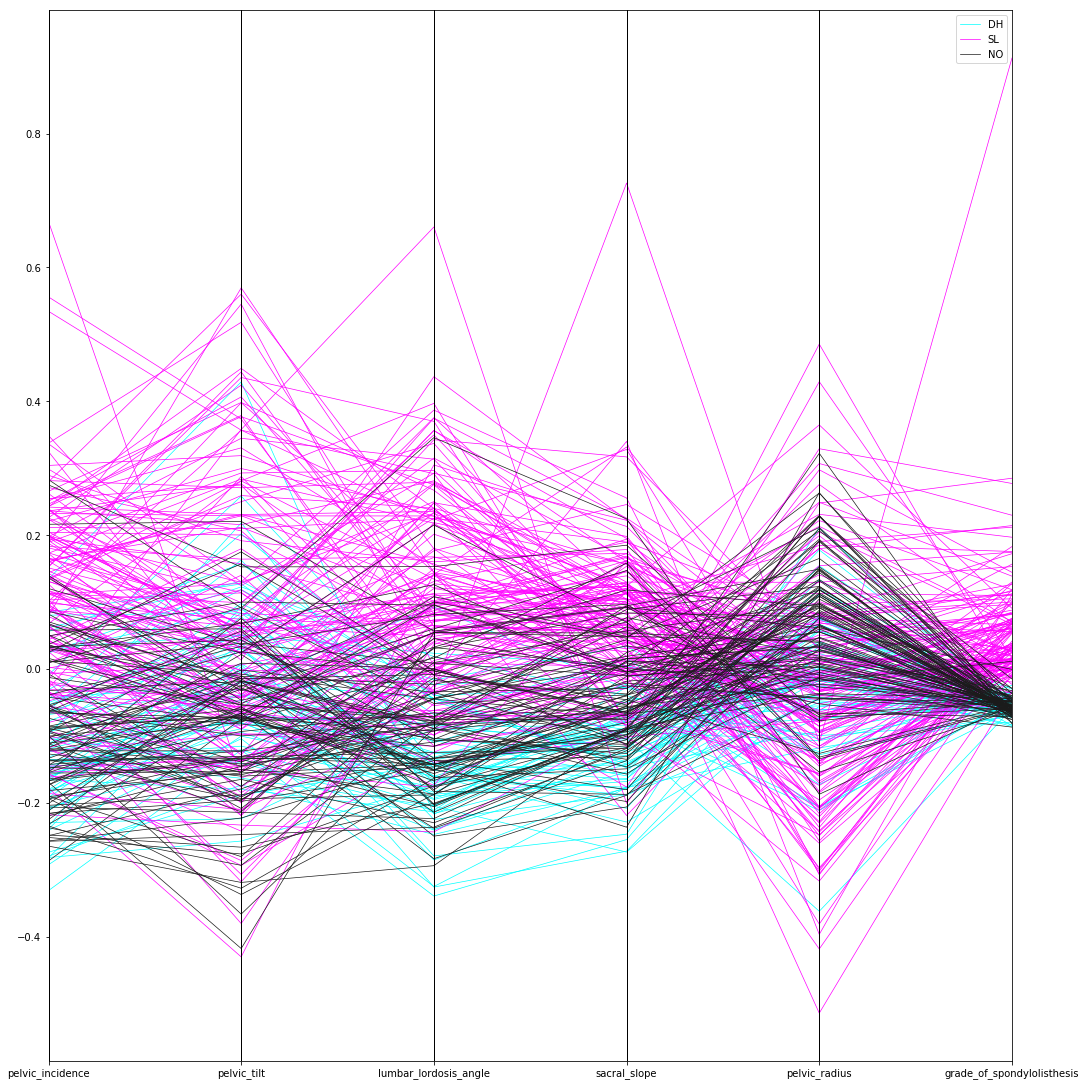

In [12]:
# Select features to include in the plot
plot_feat = header[0:6]

# Concat classes with the normalized data
data_norm = pd.concat([X_norm[plot_feat], Y], axis=1)
# print(data_norm)
fig = plt.figure(figsize=(15, 15))
# Perform parallel coordinate plot
pd.plotting.parallel_coordinates(data_norm, 'label', color=['cyan', 'magenta', '#1B1B1B'], lw=0.7)
plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=2.0)
plt.grid(False)
plt.show()

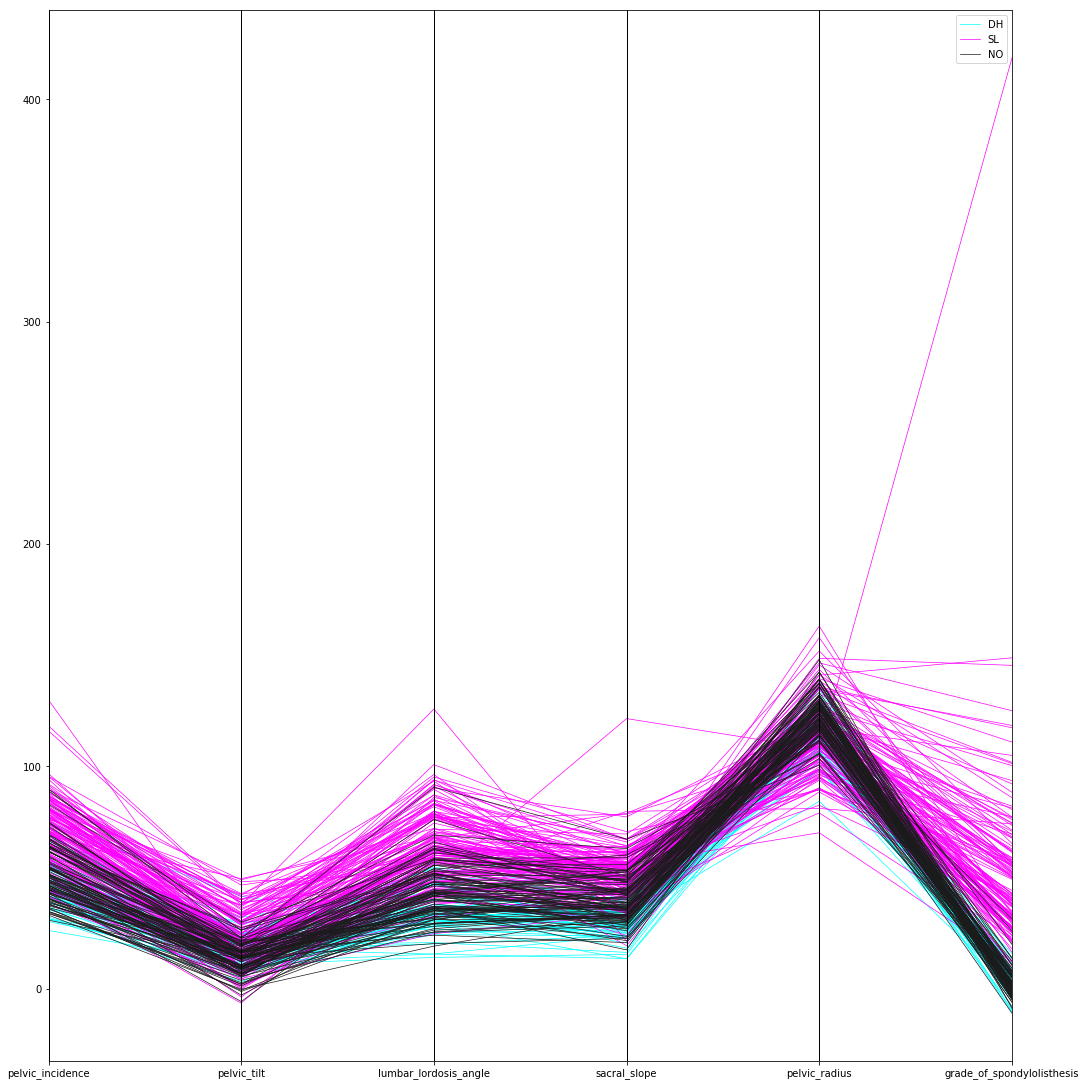

In [13]:
# Parallel coordinates for data w/o normalization

# Concat classes with the data
data_norm = pd.concat([X[plot_feat], Y], axis=1)
# print(data_norm)
fig = plt.figure(figsize=(15, 15))
# Perform parallel coordinate plot
pd.plotting.parallel_coordinates(data_norm, 'label', color=['cyan', 'magenta', '#1B1B1B'], lw=0.7)
plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=2.0)
plt.grid(False)
plt.show()